In [441]:
import os

#numpy and pandas for data manipulation
import pandas as pd
import numpy as np
import warnings
import nltk
stemmer = nltk.stem.SnowballStemmer("english")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

#matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches #for legend
import seaborn as sns

#time calculation
start_time = pd.datetime.now()

#handling warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /Users/i516055/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/i516055/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [442]:
os.chdir("/Users/i516055/Desktop/Project/Home Depot")

In [443]:
os.getcwd() #Know the current working directory

'/Users/i516055/Desktop/Project/Home Depot'

In [444]:
#List files available
print(os.listdir())

['submissionneww.csv', '~$levance_instructions.docx', 'test.csv', 'submission.csv', 'Requirements.docx', 'relevance_instructions.docx', 'submissionn.csv', 'train.csv', 'product_descriptions.csv', 'attributes.csv', '~$quirements.docx', 'sample_submission.csv']


### Reading Data

In [445]:
train_set = pd.read_csv("train.csv", encoding= "ISO-8859-1") # to handle different encoding
test_set = pd.read_csv("test.csv", encoding = "ISO-8859-1") 
prod_desc = pd.read_csv("product_descriptions.csv")
attribute_set = pd.read_csv("attributes.csv")

In [446]:
trainindex = train_set.shape[0]  #for locating the train set in the combined train/ test data

### Understanding data

In [447]:
train_set.describe()

,id,product_uid,relevance
count,74067.000000,74067.000000,74067.000000
mean,112385.709223,142331.911553,2.381634
std,64016.573650,30770.774864,0.533984
min,2.000000,100001.000000,1.000000
25%,57163.500000,115128.500000,2.000000
50%,113228.000000,137334.000000,2.330000
75%,168275.500000,166883.500000,3.000000
max,221473.000000,206650.000000,3.000000


In [448]:
test_set.describe()

,id,product_uid
count,166693.000000,166693.000000
mean,123932.839741,149713.170445
std,71518.389174,37270.476881
min,1.000000,100001.000000
25%,61669.000000,116665.000000
50%,124004.000000,142445.000000
75%,187036.000000,179444.000000
max,240760.000000,224428.000000


In [449]:
print(train_set.shape)
print(test_set.shape)
print(prod_desc.shape)
print(attribute_set.shape)

(74067, 5)
(166693, 4)
(124428, 2)
(2044803, 3)


In [450]:
#Looking at the first 5 rows of  train_set
train_set.head()

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


In [451]:
#Looking at the first 5 rows of  train_set
test_set.tail()

,id,product_uid,product_title,search_term
166688,240756,224424,stufurhome Norma 24 in. W x 16 in. D x 34 in. ...,24 whtie storage cabinet
166689,240757,224425,Home Decorators Collection 49 in. D Alessandro...,adirondeck cusion
166690,240758,224426,Simpson Strong-Tie HB 3-1/2 x 14 in. Top Flang...,hb
166691,240759,224427,1/4 in. -20 tpi x 1-1/2 in. Stainless Steel Bu...,hex sockets
166692,240760,224428,Bosch 4 in. Bi-Metal Hole Saw,4 inch hole saw


In [452]:
#Looking at the first 5 rows of  Attributes data
attribute_set.head()

,product_uid,name,value
0,100001.0,Bullet01,Versatile connector for various 90° connection...
1,100001.0,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001.0,Bullet03,Help ensure joints are consistently straight a...
3,100001.0,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001.0,Bullet05,Made from 12-Gauge steel


In [453]:
#Looking at the first 5 rows of  Product descriptions
prod_desc.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


## Joining different tables 
(since we see product_uid common across train/ test, attributes and Product descriptions)


In [454]:
alldata = pd.concat((train_set,test_set),axis =0,ignore_index=True) #binding the train and test data

In [455]:
alldata.head()

,id,product_title,product_uid,relevance,search_term
0,2,Simpson Strong-Tie 12-Gauge Angle,100001,3.00,angle bracket
1,3,Simpson Strong-Tie 12-Gauge Angle,100001,2.50,l bracket
2,9,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,100002,3.00,deck over
3,16,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,100005,2.33,rain shower head
4,17,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,100005,2.67,shower only faucet


In [456]:
alldata1 = pd.merge(alldata,prod_desc,how ='left',on='product_uid') #joining the alldata table with Prod descriptions table

In [457]:
alldata1.head()

,id,product_title,product_uid,relevance,search_term,product_description
0,2,Simpson Strong-Tie 12-Gauge Angle,100001,3.00,angle bracket,"Not only do angles make joints stronger, they ..."
1,3,Simpson Strong-Tie 12-Gauge Angle,100001,2.50,l bracket,"Not only do angles make joints stronger, they ..."
2,9,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,100002,3.00,deck over,BEHR Premium Textured DECKOVER is an innovativ...
3,16,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,100005,2.33,rain shower head,Update your bathroom with the Delta Vero Singl...
4,17,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,100005,2.67,shower only faucet,Update your bathroom with the Delta Vero Singl...


In [458]:
#grouping the attribute by the product ID and taking out the brand names (it has been recommended to keep the 
#brand name)
brand_set = attribute_set[attribute_set.name == "MFG Brand Name"]
brand_set1 = brand_set.rename(columns = {"value":"brand"})
brand_set1 = brand_set1[['product_uid','brand']]
brand_set1.head()

,product_uid,brand
9,100001.0,Simpson Strong-Tie
37,100002.0,BEHR Premium Textured DeckOver
69,100003.0,STERLING
93,100004.0,Grape Solar
122,100005.0,Delta


In [459]:
alldata2 = pd.merge(alldata1,brand_set1,how ='left',on='product_uid')
alldata2.head()

,id,product_title,product_uid,relevance,search_term,product_description,brand
0,2,Simpson Strong-Tie 12-Gauge Angle,100001,3.00,angle bracket,"Not only do angles make joints stronger, they ...",Simpson Strong-Tie
1,3,Simpson Strong-Tie 12-Gauge Angle,100001,2.50,l bracket,"Not only do angles make joints stronger, they ...",Simpson Strong-Tie
2,9,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,100002,3.00,deck over,BEHR Premium Textured DECKOVER is an innovativ...,BEHR Premium Textured DeckOver
3,16,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,100005,2.33,rain shower head,Update your bathroom with the Delta Vero Singl...,Delta
4,17,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,100005,2.67,shower only faucet,Update your bathroom with the Delta Vero Singl...,Delta


In [460]:
alldata2.dtypes

id                       int64
product_title           object
product_uid              int64
relevance              float64
search_term             object
product_description     object
brand                   object
dtype: object

In [461]:
print(alldata2.shape)

(240760, 7)


In [462]:
train = alldata2.iloc[:trainindex]
test = alldata2.iloc[trainindex:]

In [463]:
print(train.shape)
print(test.shape)

(74067, 7)
(166693, 7)


## Data Manipulation and Data Visualization

### Examine the distribution of target column in the training data

In [464]:
train['relevance'].value_counts()

3.00    19125
2.33    16060
2.67    15202
2.00    11730
1.67     6780
1.33     3006
1.00     2105
2.50       19
2.25       11
2.75       11
1.75        9
1.50        5
1.25        4
Name: relevance, dtype: int64

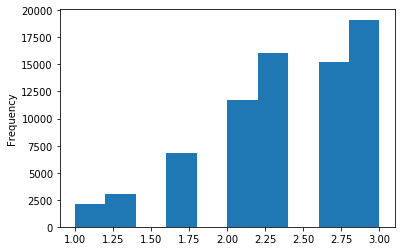

In [465]:
train['relevance'].plot.hist()

##### It's evident from the above histogram that the relevance column is skewed and most of the values are between 2 and 3

### Examine Missing Values

In [466]:
#function to calculate missing values by column 
def missing_values(df):
    #Total missing values
    misVal = df.isnull().sum()
    
    #% of missing values
    misValperc = (100*misVal)/len(df)
    
    #Make a table with results
    misValTable = pd.concat([misVal,misValperc],axis =1)
    misValTable = misValTable.rename(columns={0:'Missing Values',1:'% Missing Values'})
    return misValTable

In [467]:
missing_values(train)

,Missing Values,% Missing Values
id,0,0.000000
product_title,0,0.000000
product_uid,0,0.000000
relevance,0,0.000000
search_term,0,0.000000
product_description,0,0.000000
brand,17628,23.800073


###### As we can see around 24% of brand column is empty in the training data set, apart from that there are no missing values

In [468]:
missing_values(test)

,Missing Values,% Missing Values
id,0,0.000000
product_title,0,0.000000
product_uid,0,0.000000
relevance,166693,100.000000
search_term,0,0.000000
product_description,0,0.000000
brand,28509,17.102698


##### As we can see ~17% of brand column is empty in the test data set, apart from that there are no missing values (except Relevance, which is expected as this will be predicted later on)

Since % missing values in Brand column for both train/ test data is not very high, we'll keep the column and fill the missing values by 'No brand pres'

In [469]:
train.brand.fillna("No brand pres", inplace=True)
test.brand.fillna("No brand pres", inplace=True)

In [470]:
FullDataNoMiss = train.append(test, ignore_index = True)

In [471]:
FullDataNoMiss.shape

(240760, 7)

In [472]:
FullDataNoMiss1 = FullDataNoMiss

In [473]:
# no. of unique products with no brand names in training and testing data
print(train[train.brand == "No brand pres"]['product_uid'].unique().shape[0])
print(test[test.brand == "No brand pres"]['product_uid'].unique().shape[0])

16313
25014


### No. of unique products in training and testing data

In [474]:
# no. of unique products in training and testing data
print(train['product_uid'].unique().shape[0])
print(test['product_uid'].unique().shape[0])

54667
97460


### No. of unique search terms in training and testing data

In [475]:
print(train['search_term'].unique().shape[0])
print(test['search_term'].unique().shape[0])

11795
22427


### Distribution of lengths of product_title (in terms of # of characters)

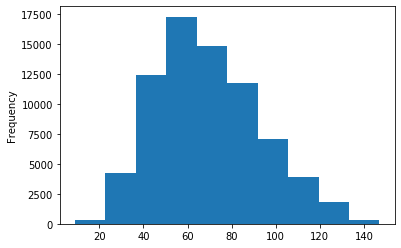

In [476]:
train['product_title'].str.len().plot.hist()

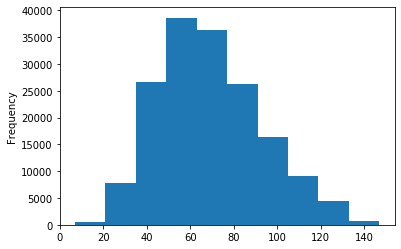

In [477]:
test['product_title'].str.len().plot.hist()

### Distribution of lengths of product_descriptions (in terms of # of characters)

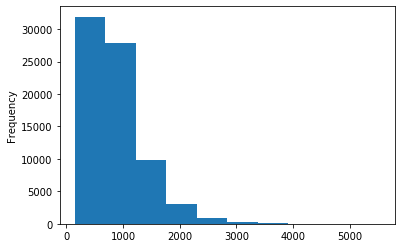

In [478]:
train['product_description'].str.len().plot.hist()

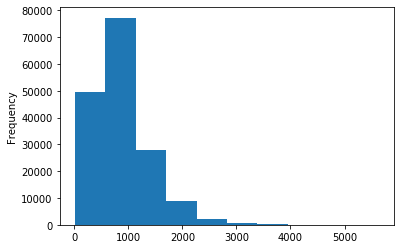

In [479]:
test['product_description'].str.len().plot.hist()

### Distribution of no. of words in search terms 

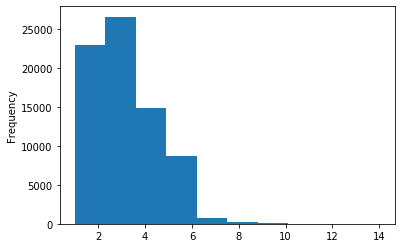

In [480]:
(train['search_term'].str.count("\\s+") + 1).plot.hist()

In [481]:
(train['search_term'].str.count("\\s+") + 1).describe()

count    74067.000000
mean         3.159207
std          1.262096
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         14.000000
Name: search_term, dtype: float64

##### On average, people are searching with a query of 3 words (from the training data)

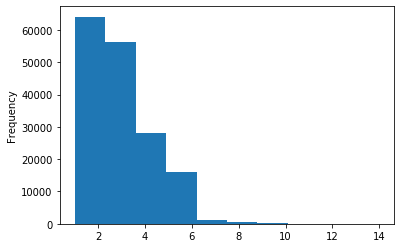

In [482]:
(test['search_term'].str.count("\\s+") + 1).plot.hist()

In [483]:
(test['search_term'].str.count("\\s+") + 1).describe()

count    166693.000000
mean          2.982375
std           1.259228
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          14.000000
Name: search_term, dtype: float64

##### On average, people are searching with a query of 3 words (test data); this is in lines with observation in training data

### Examine the distribution of product_uid

In [484]:
train['product_uid'].value_counts()

101959    21
102893    21
101892    18
104691    17
101539    17
          ..
156132     1
154083     1
113119     1
100825     1
133121     1
Name: product_uid, Length: 54667, dtype: int64

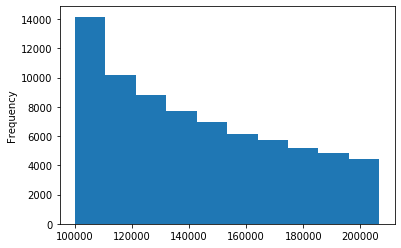

In [485]:
train['product_uid'].plot.hist(bins = 10)

In [486]:
test['product_uid'].value_counts()

101892    52
101280    35
101442    35
101148    34
102456    31
          ..
119031     1
112890     1
110843     1
162050     1
110474     1
Name: product_uid, Length: 97460, dtype: int64

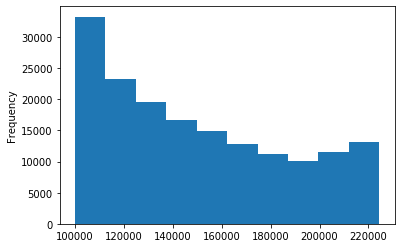

In [487]:
test['product_uid'].plot.hist()

##### From both train and test sets, it is evident that count of product IDs are spread across, but majorly smaller the product ID, higher is the count. There is a little change in behavior in the test data in the end

### Respective occurence of product IDs by Search terms

In [488]:
temp = train.groupby(by =['search_term'],as_index=False)['product_uid'].count()
product_uids_per_search = temp.rename(columns = {'product_uid':'No. of products'})

In [489]:
product_uids_per_search.sort_values('No. of products',ascending = False)

,search_term,No. of products
3065,burgundy red foot stools,16
7232,metal sheet,16
157,1/2 zip wall,16
2646,bed frames headboaed,16
2257,anderson windows 400 seriesimpact resistant,16
...,...,...
7024,makita oscilating saw,1
1363,5 ft metal roof panel,1
4429,dryer vent guard,1
10802,tuscany ivory,1


In [490]:
product_uids_per_search['No. of products'].value_counts()

1     1399
8     1318
7     1248
9     1203
6     1038
10     983
2      943
5      868
3      837
4      695
11     611
12     357
13     191
14      71
15      24
16       9
Name: No. of products, dtype: int64

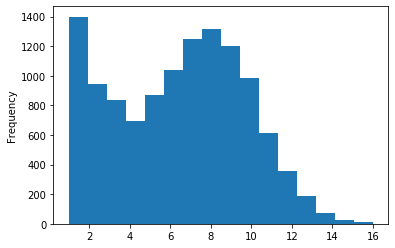

In [491]:
product_uids_per_search['No. of products'].plot.hist(bins = 16)

##### In training data, High no. of searches are associated with only 1 product ID; Max no. of different product IDs associated with a search is 16 
##### There is also a high presence of no. of product IDs (6,7,8,9,10) associated with  search terms

In [492]:
temp_test = test.groupby(by =['search_term'],as_index=False)['product_uid'].count()
product_uids_per_search_test = temp_test.rename(columns = {'product_uid':'No. of products'})

In [493]:
product_uids_per_search_test.sort_values('No. of products',ascending = False)

,search_term,No. of products
15410,patio chair cushions,36
19022,speaker wire,23
7135,column,23
9168,exhaust fan,23
5610,block wall,23
...,...,...
4875,bar stool height extenders,1
2078,34 in. X 60 in. shower base,1
4877,baraar emy,1
14067,microwave 16 1/4 height,1


In [494]:
product_uids_per_search_test['No. of products'].value_counts()

1     3446
2     2560
3     1820
4     1282
8     1251
9     1214
7     1183
10    1125
5     1074
6     1066
11     990
12     775
15     694
16     694
13     694
17     668
14     636
18     517
19     327
20     184
23     163
21      48
22      15
36       1
Name: No. of products, dtype: int64

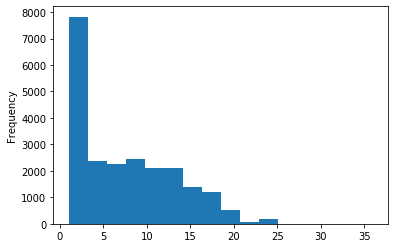

In [495]:
product_uids_per_search_test['No. of products'].plot.hist(bins = 16)

##### a) In test data, High no. of searches are associated with only 1 product ID; Max no. of different product IDs associated with a search is 36
##### Unlike the train data, in test data, no. of product IDs (1,2,3,4) associated with search terms covers considerable % of the data set; also test data has bigger tail

### Respective occurence of search terms by Product IDs

In [496]:
temp_search = train.groupby(by =['product_uid'],as_index=False)['search_term'].count()
search_per_product = temp_search.rename(columns = {'search_term':'No. of searches'})

In [497]:
search_per_product.sort_values('No. of searches',ascending = False)

,product_uid,No. of searches
2190,102893,21
1506,101959,21
1450,101892,18
1869,102456,17
1175,101539,17
...,...,...
22954,138130,1
22955,138131,1
22956,138134,1
22957,138135,1


In [498]:
search_per_product['No. of searches'].value_counts()

1     42765
2      7824
3      2385
4       909
5       386
6       190
7        95
8        45
9        27
10       13
14        8
13        5
11        4
12        4
17        3
21        2
18        1
15        1
Name: No. of searches, dtype: int64

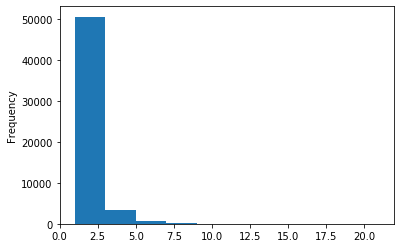

In [499]:
search_per_product['No. of searches'].plot.hist()

##### In train data, Most no. of product IDs are associated with only 1 search term; Max no. of different search terms associated with a product ID is 21
##### There is also a high presence of no. of search terms (1,2,3,4) that are associated with product IDs

In [500]:
temp_search_test = test.groupby(by =['product_uid'],as_index=False)['search_term'].count()
search_per_product_test = temp_search_test.rename(columns = {'search_term':'No. of searches'})

In [501]:
search_per_product_test.sort_values('No. of searches',ascending = False)

,product_uid,No. of searches
1729,101892,52
1322,101442,35
1172,101280,35
1052,101148,34
2243,102456,31
...,...,...
12159,114345,1
51575,165593,1
51576,165594,1
51577,165595,1


In [502]:
search_per_product_test['No. of searches'].value_counts()

1     65783
2     16815
3      6799
4      3279
5      1810
6      1033
7       619
8       405
9       286
10      177
11      112
12       82
13       57
14       43
15       34
16       26
17       17
18       15
19       15
20       11
21       11
22        9
24        5
26        4
25        3
35        2
27        2
31        2
23        1
30        1
34        1
52        1
Name: No. of searches, dtype: int64

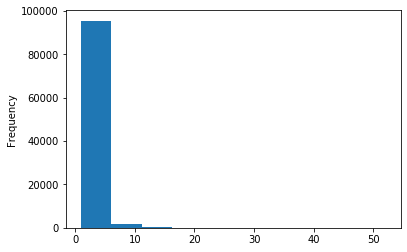

In [503]:
search_per_product_test['No. of searches'].plot.hist()

##### In test data, Most no. of product IDs are associated with only 1 search term; Max no. of different search terms associated with a product ID is 52
##### Unlike the train data, test data has a bigger tail with the occurence of values from 1 to 52

### Word Count in Search terms 

In [504]:
is_noun = lambda pos: pos[:2] == "NN"
def keywords_inventory(dataframe, colonne = 'Description'):
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)]
        for t in nouns:
             t = t.lower() ; racine = stemmer.stem(t)
             if racine in keywords_roots:               
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1               
             else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1: 
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)           
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]                  
    print("No of keywords in variable '{}': {}".format(colonne,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

In [505]:
search_table = pd.DataFrame(train['search_term'].unique()).rename(columns= {0:"Description"})

In [506]:
search_table.shape

(11795, 1)

In [507]:
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(search_table)

No of keywords in variable 'Description': 5078


In [508]:
list_search_terms = []
for k,v in count_keywords.items():
    list_search_terms.append([keywords_select[k],v])
list_search_terms.sort(key = lambda x:x[1], reverse = True)

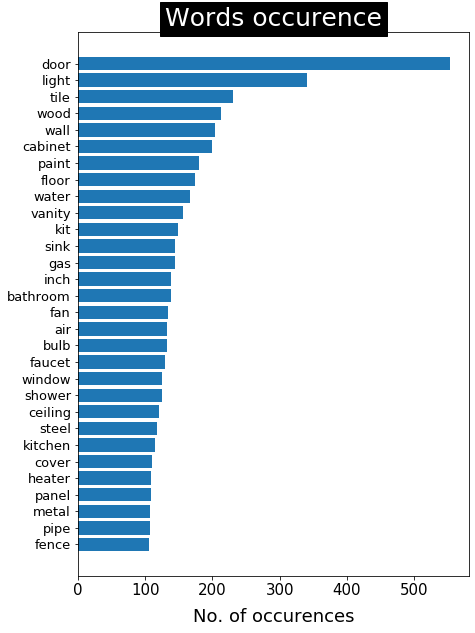

In [509]:
liste = sorted(list_search_terms, key = lambda x:x[1], reverse = True)
#_______________________________
plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 10))
y_axis = [i[1] for i in liste[:30]]
x_axis = [k for k,i in enumerate(liste[:30])]
x_label = [i[0] for i in liste[:30]]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.yticks(x_axis, x_label)
plt.xlabel("No. of occurences", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()
#_______________________________________________________________________________________
plt.title("Words occurence",bbox={'facecolor':'k', 'pad':5}, color='w',fontsize = 25)
plt.show()

In [510]:
FullDataNoMiss1.head()

,id,product_title,product_uid,relevance,search_term,product_description,brand
0,2,Simpson Strong-Tie 12-Gauge Angle,100001,3.00,angle bracket,"Not only do angles make joints stronger, they ...",Simpson Strong-Tie
1,3,Simpson Strong-Tie 12-Gauge Angle,100001,2.50,l bracket,"Not only do angles make joints stronger, they ...",Simpson Strong-Tie
2,9,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,100002,3.00,deck over,BEHR Premium Textured DECKOVER is an innovativ...,BEHR Premium Textured DeckOver
3,16,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,100005,2.33,rain shower head,Update your bathroom with the Delta Vero Singl...,Delta
4,17,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,100005,2.67,shower only faucet,Update your bathroom with the Delta Vero Singl...,Delta


## Feature Engineering

### Stemming

In [511]:
def str_stemmer(s):
    return " ".join([stemmer.stem(word) for word in s.lower().split()])

def str_common_word(str1, str2):
    return sum(int(str2.find(word)>=0) for word in str1.split())

In [512]:
FullDataNoMiss1['search_term'] = FullDataNoMiss1['search_term'].map(lambda x:str_stemmer(x))

In [513]:
FullDataNoMiss1['product_title'] = FullDataNoMiss1['product_title'].map(lambda x:str_stemmer(x))

In [514]:
FullDataNoMiss1['product_description'] = FullDataNoMiss1['product_description'].map(lambda x:str_stemmer(x))

In [515]:
FullDataNoMiss1['brand'] = FullDataNoMiss1['brand'].map(lambda x:str_stemmer(x))

In [516]:
FullDataNoMiss1.shape

(240760, 7)

In [517]:
FullDataNoMiss1.head()

,id,product_title,product_uid,relevance,search_term,product_description,brand
0,2,simpson strong-ti 12-gaug angl,100001,3.00,angl bracket,"not onli do angl make joint stronger, they als...",simpson strong-ti
1,3,simpson strong-ti 12-gaug angl,100001,2.50,l bracket,"not onli do angl make joint stronger, they als...",simpson strong-ti
2,9,behr premium textur deckov 1-gal. #sc-141 tugb...,100002,3.00,deck over,behr premium textur deckov is an innov solid c...,behr premium textur deckov
3,16,delta vero 1-handl shower onli faucet trim kit...,100005,2.33,rain shower head,updat your bathroom with the delta vero single...,delta
4,17,delta vero 1-handl shower onli faucet trim kit...,100005,2.67,shower onli faucet,updat your bathroom with the delta vero single...,delta


### Length of words in Search term, Title, Prod description and Brand

In [518]:
FullDataNoMiss1['len_of_search'] = FullDataNoMiss1['search_term'].map(lambda x:len(x.split())).astype(np.int64)

In [519]:
FullDataNoMiss1['len_of_title'] = FullDataNoMiss1['product_title'].map(lambda x:len(x.split())).astype(np.int64)

In [520]:
FullDataNoMiss1['len_of_prod_desc'] = FullDataNoMiss1['product_description'].map(lambda x:len(x.split())).astype(np.int64)

In [521]:
FullDataNoMiss1['len_of_brand'] = FullDataNoMiss1['brand'].map(lambda x:len(x.split())).astype(np.int64)

In [522]:
FullDataNoMiss1.shape

(240760, 11)

In [523]:
FullDataNoMiss1.head()

,id,product_title,product_uid,relevance,search_term,product_description,brand,len_of_search,len_of_title,len_of_prod_desc,len_of_brand
0,2,simpson strong-ti 12-gaug angl,100001,3.00,angl bracket,"not onli do angl make joint stronger, they als...",simpson strong-ti,2,4,129,2
1,3,simpson strong-ti 12-gaug angl,100001,2.50,l bracket,"not onli do angl make joint stronger, they als...",simpson strong-ti,2,4,129,2
2,9,behr premium textur deckov 1-gal. #sc-141 tugb...,100002,3.00,deck over,behr premium textur deckov is an innov solid c...,behr premium textur deckov,2,11,167,4
3,16,delta vero 1-handl shower onli faucet trim kit...,100005,2.33,rain shower head,updat your bathroom with the delta vero single...,delta,3,13,104,1
4,17,delta vero 1-handl shower onli faucet trim kit...,100005,2.67,shower onli faucet,updat your bathroom with the delta vero single...,delta,3,13,104,1


In [524]:
FullDataNoMiss1['product_full_content'] = FullDataNoMiss1['search_term']+"\t"+FullDataNoMiss1['product_title']+"\t"+FullDataNoMiss1['product_description'] +"\t"+ FullDataNoMiss1['brand']

In [525]:
FullDataNoMiss1.head()

,id,product_title,product_uid,relevance,search_term,product_description,brand,len_of_search,len_of_title,len_of_prod_desc,len_of_brand,product_full_content
0,2,simpson strong-ti 12-gaug angl,100001,3.00,angl bracket,"not onli do angl make joint stronger, they als...",simpson strong-ti,2,4,129,2,angl bracket\tsimpson strong-ti 12-gaug angl\t...
1,3,simpson strong-ti 12-gaug angl,100001,2.50,l bracket,"not onli do angl make joint stronger, they als...",simpson strong-ti,2,4,129,2,l bracket\tsimpson strong-ti 12-gaug angl\tnot...
2,9,behr premium textur deckov 1-gal. #sc-141 tugb...,100002,3.00,deck over,behr premium textur deckov is an innov solid c...,behr premium textur deckov,2,11,167,4,deck over\tbehr premium textur deckov 1-gal. #...
3,16,delta vero 1-handl shower onli faucet trim kit...,100005,2.33,rain shower head,updat your bathroom with the delta vero single...,delta,3,13,104,1,rain shower head\tdelta vero 1-handl shower on...
4,17,delta vero 1-handl shower onli faucet trim kit...,100005,2.67,shower onli faucet,updat your bathroom with the delta vero single...,delta,3,13,104,1,shower onli faucet\tdelta vero 1-handl shower ...


### No. of Common 'search term' words in  Title, Prod description and Brand

In [526]:
FullDataNoMiss1['no_search_words_in_title'] = FullDataNoMiss1['product_full_content'].map(lambda x:str_common_word(x.split('\t')[0],x.split('\t')[1]))


In [527]:
FullDataNoMiss1['no_search_words_in_description'] = FullDataNoMiss1['product_full_content'].map(lambda x:str_common_word(x.split('\t')[0],x.split('\t')[2]))

In [528]:
FullDataNoMiss1['no_search_words_in_brand'] = FullDataNoMiss1['product_full_content'].map(lambda x:str_common_word(x.split('\t')[0],x.split('\t')[3]))

In [529]:
FullDataNoMiss1 = FullDataNoMiss1.drop(['search_term','product_title','product_description','product_full_content','brand'],axis=1)

In [530]:
FullDataNoMiss1.head()

,id,product_uid,relevance,len_of_search,len_of_title,len_of_prod_desc,len_of_brand,no_search_words_in_title,no_search_words_in_description,no_search_words_in_brand
0,2,100001,3.00,2,4,129,2,1,1,0
1,3,100001,2.50,2,4,129,2,1,1,0
2,9,100002,3.00,2,11,167,4,1,1,1
3,16,100005,2.33,3,13,104,1,1,1,0
4,17,100005,2.67,3,13,104,1,3,2,0


###  Ratio of No. of Common 'search term' words and No. of words in Search term

In [531]:
FullDataNoMiss1['Title_to_Search_words'] = FullDataNoMiss1['no_search_words_in_title']/FullDataNoMiss1['len_of_search']


In [532]:
FullDataNoMiss1['Descrip_to_Search_words'] = FullDataNoMiss1['no_search_words_in_description']/FullDataNoMiss1['len_of_search']


In [533]:
FullDataNoMiss1['brand_to_Search_words'] = FullDataNoMiss1['no_search_words_in_brand']/FullDataNoMiss1['len_of_search']


In [534]:
FullDataNoMiss1.head()

,id,product_uid,relevance,len_of_search,len_of_title,len_of_prod_desc,len_of_brand,no_search_words_in_title,no_search_words_in_description,no_search_words_in_brand,Title_to_Search_words,Descrip_to_Search_words,brand_to_Search_words
0,2,100001,3.00,2,4,129,2,1,1,0,0.500000,0.500000,0.0
1,3,100001,2.50,2,4,129,2,1,1,0,0.500000,0.500000,0.0
2,9,100002,3.00,2,11,167,4,1,1,1,0.500000,0.500000,0.5
3,16,100005,2.33,3,13,104,1,1,1,0,0.333333,0.333333,0.0
4,17,100005,2.67,3,13,104,1,3,2,0,1.000000,0.666667,0.0


### Correlation between variables

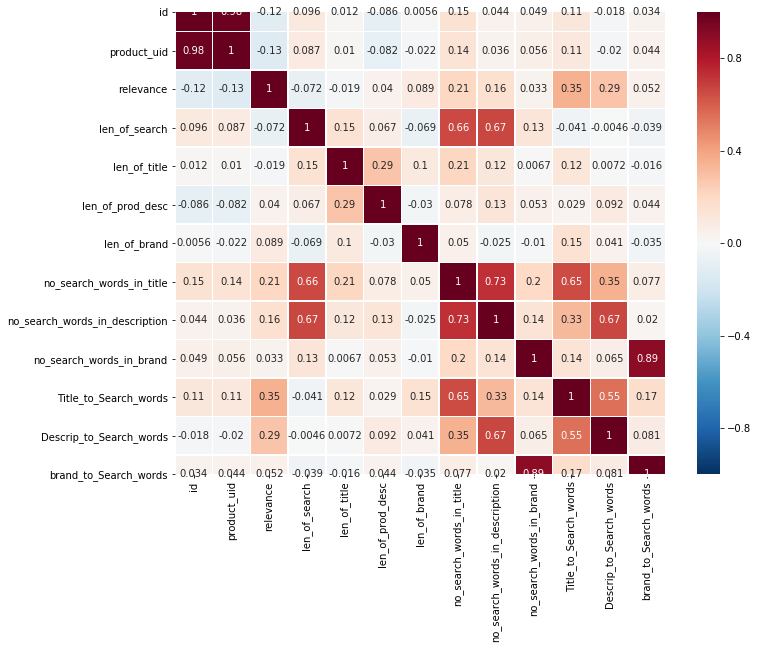

In [535]:
f, ax = plt.subplots(figsize=(11, 8.5))
cormat = FullDataNoMiss1.corr(method= "pearson")
sns.heatmap(cormat,xticklabels=cormat.columns,yticklabels=cormat.columns,vmin=-1, vmax=1, center=0,
            cmap='RdBu_r',annot=True,linewidth=0.5)
#cormat.style.background_gradient(cmap = 'coolwarm').set_precision(1) #RdBu_r

In [536]:
df_train = FullDataNoMiss1.iloc[:trainindex]
df_test = FullDataNoMiss1.iloc[trainindex:]
id_test = df_test['id']

y_train = df_train['relevance'].values
X_train = df_train.drop(['id','relevance'],axis=1).values
X_test = df_test.drop(['id','relevance'],axis=1).values

In [537]:
print(y_train.shape,X_train.shape,X_test.shape)

(74067,) (74067, 11) (166693, 11)


In [538]:
X_trainFeatures = df_train.drop(['id','relevance'],axis=1).columns
X_trainFeatures

Index(['product_uid', 'len_of_search', 'len_of_title', 'len_of_prod_desc',
       'len_of_brand', 'no_search_words_in_title',
       'no_search_words_in_description', 'no_search_words_in_brand',
       'Title_to_Search_words', 'Descrip_to_Search_words',
       'brand_to_Search_words'],
      dtype='object')

### Splitting train data into trainRed/ hold-out to evaluate model performance on unseen data (but have label to find performance)

In [539]:
print(y_train.shape,X_train.shape)

(74067,) (74067, 11)


In [540]:
nstop = 10
rmse_trn = pd.DataFrame(np.zeros((nstop,4)),columns = ['LR','BG','GB','RF'])
rmse_tst = pd.DataFrame(np.zeros((nstop,4)),columns = ['LR','BG','GB','RF'])
rsq_trn = pd.DataFrame(np.zeros((nstop,4)),columns = ['LR','BG','GB','RF'])
rsq_tst = pd.DataFrame(np.zeros((nstop,4)),columns = ['LR','BG','GB','RF'])

In [541]:
np.random.seed(1)
for n in range(nstop):
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_train, y_train, test_size = .3)
    X_trn_save = X_trn.copy()
    X_tst_save = X_tst.copy()
    Y_trn_save = Y_trn.copy()
    Y_tst_save = Y_tst.copy()

# Linear regression

    LR = LinearRegression(copy_X=True).fit(X_trn,Y_trn)
    predict_LR_trn = LR.predict(X_trn)
    predict_LR_tst = LR.predict(X_tst)
    rmse_trn.loc[n,'LR'] = sqrt(mean_squared_error(Y_trn,predict_LR_trn))
    rmse_tst.loc[n,'LR'] = sqrt(mean_squared_error(Y_tst,predict_LR_tst))
    rsq_trn.loc[n,'LR'] = r2_score(Y_trn,predict_LR_trn)
    rsq_tst.loc[n,'LR'] = r2_score(Y_tst,predict_LR_tst)

    X_trn = X_trn_save
    X_tst = X_tst_save
    Y_trn = Y_trn_save
    Y_tst = Y_tst_save
    
# Bagging  

    BG = BaggingRegressor(n_estimators=45, max_samples=0.1, random_state=25)
    BG.fit(X_trn,Y_trn)
    predict_BG_trn = BG.predict(X_trn)
    predict_BG_tst = BG.predict(X_tst)
    rmse_trn.loc[n,'BG'] = sqrt(mean_squared_error(Y_trn,predict_BG_trn))
    rmse_tst.loc[n,'BG'] = sqrt(mean_squared_error(Y_tst,predict_BG_tst))
    rsq_trn.loc[n,'BG'] = r2_score(Y_trn,predict_BG_trn)
    rsq_tst.loc[n,'BG'] = r2_score(Y_tst,predict_BG_tst)

    X_trn = X_trn_save
    X_tst = X_tst_save
    Y_trn = Y_trn_save
    Y_trn = Y_trn_save

# Gradient boosting tree   

    params = {'n_estimators':300, 'max_depth':4, 'min_samples_split':20, 'learning_rate':.2,'loss':'ls'}
    GB = GradientBoostingRegressor(**params)
    GB.fit(X_trn,Y_trn)
    predict_GB_trn = GB.predict(X_trn)
    predict_GB_tst = GB.predict(X_tst)
    rmse_trn.loc[n,'GB'] = sqrt(mean_squared_error(Y_trn,predict_GB_trn))
    rmse_tst.loc[n,'GB'] = sqrt(mean_squared_error(Y_tst,predict_GB_tst))
    rsq_trn.loc[n,'GB'] = r2_score(Y_trn,predict_GB_trn)
    rsq_tst.loc[n,'GB'] = r2_score(Y_tst,predict_GB_tst)

    X_trn = X_trn_save
    X_tst = X_tst_save
    Y_trn = Y_trn_save
    Y_tst = Y_tst_save

# Random forest

    RF = RandomForestRegressor(n_estimators=100, max_depth=20,min_samples_leaf = 5, min_samples_split = 10)   
    RF.fit(X_trn,Y_trn)
    predict_RF_trn = RF.predict(X_trn)
    predict_RF_tst = RF.predict(X_tst)
    rmse_trn.loc[n,'RF'] = sqrt(mean_squared_error(Y_trn,predict_RF_trn))
    rmse_tst.loc[n,'RF'] = sqrt(mean_squared_error(Y_tst,predict_RF_tst))
    rsq_trn.loc[n,'RF'] = r2_score(Y_trn,predict_RF_trn)
    rsq_tst.loc[n,'RF'] = r2_score(Y_tst,predict_RF_tst)

   
    print('loop', n)
    print("training: ",rmse_trn.loc[n,'LR'],rmse_trn.loc[n,'BG'],rmse_trn.loc[n,'GB'],rmse_trn.loc[n,'RF'])
    print("training: ",rsq_trn.loc[n,'LR'],rsq_trn.loc[n,'BG'],rsq_trn.loc[n,'GB'],rsq_trn.loc[n,'RF'])
    print("testing: ",rmse_tst.loc[n,'LR'],rmse_tst.loc[n,'BG'],rmse_tst.loc[n,'GB'],rmse_tst.loc[n,'RF'])
    print("testing: ",rsq_tst.loc[n,'LR'],rsq_tst.loc[n,'BG'],rsq_tst.loc[n,'GB'],rsq_tst.loc[n,'RF'])

loop 0
training:  0.4894250932250898 0.44124329388018174 0.45743072308748073 0.37920711348156855
training:  0.16089333710468856 0.3179739842743773 0.2670145295216182 0.49627018556367597
testing:  0.4866507524166988 0.48411781203665977 0.47942573551969864 0.48230857651023384
testing:  0.16714710342588313 0.17579427695196703 0.19169328156895704 0.1819431763716578
loop 1
training:  0.4889749420209727 0.44058284027853634 0.458567942634195 0.37691061354345995
training:  0.16413337594061084 0.3213920654851449 0.2648581302380957 0.5033613546017626
testing:  0.48769495119106926 0.48500754979985844 0.48080813743767026 0.48330237285564953
testing:  0.15958001533080368 0.16881662140391795 0.18314782379614136 0.17465085328346142
loop 2
training:  0.4896071413201237 0.44121186704247456 0.45861335616936577 0.379894232945666
training:  0.1624291891050671 0.3198253899930299 0.2651148975610367 0.49574356642498896
testing:  0.48620614352529407 0.4841542149299245 0.47921936013377825 0.4835944022526396
te

In [542]:
X_trn_save.shape

(51846, 11)

In [543]:
rmse_tst

,LR,BG,GB,RF
0,0.486651,0.484118,0.479426,0.482309
1,0.487695,0.485008,0.480808,0.483302
2,0.486206,0.484154,0.479219,0.483594
3,0.486907,0.486104,0.480311,0.484117
4,0.487845,0.487380,0.481006,0.485863
5,0.483373,0.480004,0.477265,0.479222
6,0.487336,0.486356,0.481370,0.483580
7,0.489737,0.486485,0.482042,0.486097
8,0.488143,0.485745,0.480682,0.483590
9,0.486932,0.483645,0.479512,0.481935


In [544]:
rsq_tst

,LR,BG,GB,RF
0,0.167147,0.175794,0.191693,0.181943
1,0.159580,0.168817,0.183148,0.174651
2,0.163599,0.170644,0.187465,0.172561
3,0.164849,0.167604,0.187323,0.174394
4,0.163153,0.164748,0.186453,0.169941
5,0.166005,0.177590,0.186950,0.180266
6,0.158653,0.162033,0.179129,0.171574
7,0.160942,0.172051,0.187102,0.173370
8,0.167039,0.175203,0.192307,0.182505
9,0.168062,0.179258,0.193224,0.185051


### Picking the best Model by averaging value of RMSE and R squared across different models

In [545]:
print('LR:',rsq_trn['LR'].mean(),rsq_tst['LR'].mean())
print('BG:',rsq_trn['BG'].mean(),rsq_tst['BG'].mean())
print('GB:',rsq_trn['GB'].mean(),rsq_tst['GB'].mean())
print('RF:',rsq_trn['RF'].mean(),rsq_tst['RF'].mean())

LR: 0.1622633927072629 0.1639028729971883
BG: 0.3187436354182451 0.17137426498331418
GB: 0.26520422882584466 0.1874794606743885
RF: 0.4976180139761678 0.17662545674417568


In [546]:
print('LR:',rmse_trn['LR'].mean(),rmse_tst['LR'].mean())
print('BG:',rmse_trn['BG'].mean(),rmse_tst['BG'].mean())
print('GB:',rmse_trn['GB'].mean(),rmse_tst['GB'].mean())
print('RF:',rmse_trn['RF'].mean(),rmse_tst['RF'].mean())

LR: 0.48924069631826345 0.4870826213614284
BG: 0.4411879894348901 0.4848997258446328
GB: 0.45819684318261694 0.480164064268277
RF: 0.37886473564949086 0.48336087277849177


####  Hence it is evident 'GB' model performs best considering two evaluation metrics - RMSE and R squared value

In [547]:
# Gradient boosting tree   
np.random.seed(1)
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_train, y_train, test_size = .3)
params = {'n_estimators':300, 'max_depth':4, 'min_samples_split':20, 'learning_rate':.2,'loss':'ls'}
GB = GradientBoostingRegressor(**params)
GB.fit(X_trn,Y_trn)
predict_GB_trn = GB.predict(X_trn)
predict_GB_tst = GB.predict(X_tst)
rmse_trn_GB = sqrt(mean_squared_error(Y_trn,predict_GB_trn))
rmse_tst_GB = sqrt(mean_squared_error(Y_tst,predict_GB_tst))

In [548]:
print("RMSE_train:",rmse_trn_GB,"RMSE_test:",rmse_tst_GB)

RMSE_train: 0.45743072308748073 RMSE_test: 0.47942573551969864


### Training Deviance

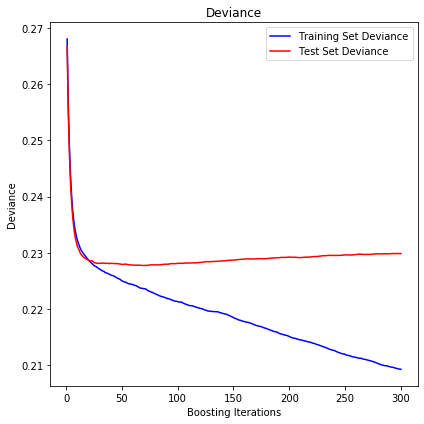

In [549]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(GB.staged_predict(X_tst)):
    test_score[i] = GB.loss_(Y_tst, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, GB.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

#### As evident from the training deviance plot, Ideal # of iterations to select is around 25 for best results, after which Test Error seems to be increasing and possibly overfitting

### Running the GB model again with n_estimators: 25

In [550]:
np.random.seed(1)
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_train, y_train, test_size = .3)
params = {'n_estimators':25, 'max_depth':4, 'min_samples_split':20, 'learning_rate':.2,'loss':'ls'}
GB = GradientBoostingRegressor(**params)
GB.fit(X_trn,Y_trn)
predict_GB_trn = GB.predict(X_trn)
predict_GB_tst = GB.predict(X_tst)
rmse_trn_GB = sqrt(mean_squared_error(Y_trn,predict_GB_trn))
rmse_tst_GB = sqrt(mean_squared_error(Y_tst,predict_GB_tst))

In [551]:
print("RMSE_train:",rmse_trn_GB,"RMSE_test:",rmse_tst_GB)

RMSE_train: 0.47720029436048866 RMSE_test: 0.4777400649374804


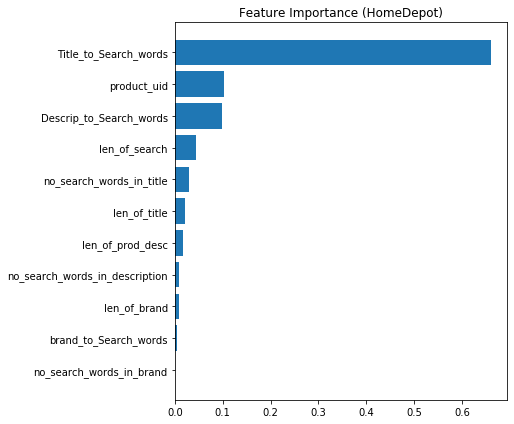

In [552]:
np.random.seed(1)
feature_importance = GB.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos,X_trainFeatures[sorted_idx])
plt.title('Feature Importance (HomeDepot)')
fig.tight_layout()
plt.show()

In [553]:
feature_importance[sorted_idx]

array([4.16640491e-04, 4.46039545e-03, 9.70954759e-03, 9.76361134e-03,
       1.70132290e-02, 2.22533711e-02, 2.93438807e-02, 4.44035655e-02,
       9.88799565e-02, 1.03357606e-01, 6.60398196e-01])

In [554]:
X_trainFeatures[sorted_idx]

Index(['no_search_words_in_brand', 'brand_to_Search_words', 'len_of_brand',
       'no_search_words_in_description', 'len_of_prod_desc', 'len_of_title',
       'no_search_words_in_title', 'len_of_search', 'Descrip_to_Search_words',
       'product_uid', 'Title_to_Search_words'],
      dtype='object')

### Predicting values of original Test data

In [555]:
y_pred_test = GB.predict(X_test)

In [556]:
pd.DataFrame({"id": id_test, "relevance": y_pred_test}).to_csv('submission.csv',index=False)

In [557]:
end_time = pd.datetime.now()
print('RunTime:',(end_time - start_time))

RunTime: 0:11:10.018523
